# 0. Project Goals
	
1.	Build a predictive model for GDP per capita across G20 countries using global indicator data from 1970 to 2023.
2.	Identify key economic factors that significantly influence GDP per capita.
3.	Explore whether stock market indicators also contribute to explaining or predicting GDP per capita.

# 1. Import the required Python Libraries

In [1]:
# suppress warning
import warnings
warnings.filterwarnings('ignore')

# standard data science libraries
import numpy as np
import pandas as pd

# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# set visualization style
sns.set(style='whitegrid')

# 2. Data Loading and Preprocess

In [2]:
# load the dataset
data_path = "Data/world_bank_indicators.csv"
data = pd.read_csv(data_path, parse_dates=["year"], delimiter=',')
data["year"] = data["year"].dt.year
data.head()

,year,country,updated_at,Access to electricity (% of population),"Adjusted net savings, including particulate emission damage (% of GNI)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (% of GDP)",...,Time required to get electricity (days),Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Total natural resources rents (% of GDP),"Total reserves (includes gold, current US$)",Total tax and contribution rate (% of profit),Trained teachers in primary education (% of total teachers),"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,1960,abw,2025-04-03 02:52:37 UTC,NaN,NaN,44.732000,83.046159,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960,afe,2025-04-03 02:52:37 UTC,NaN,NaN,135.793291,88.967697,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960,afg,2025-04-03 02:52:37 UTC,NaN,NaN,140.598000,81.061389,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,50690800.0,NaN,NaN,NaN,NaN,NaN
3,1960,afw,2025-04-03 02:52:37 UTC,NaN,NaN,161.129238,81.439385,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1960,ago,2025-04-03 02:52:37 UTC,NaN,NaN,92.548000,79.938393,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Extract the data of g20 countries from 1980 to present.

In [3]:
# extract data of only g20 countries
g20_countries = ['arg', 'aus','bra','can','chn','fra','deu','ind','idn', 'ita', 'jpn',
                 'kor','mex','rus','sau','zaf','gbr', 'usa','au','eu']
g20_mask = data["country"].isin(g20_countries)
g20_data = data.loc[g20_mask,:]

g20_data["country"].unique()

array(['arg', 'aus', 'bra', 'can', 'chn', 'deu', 'fra', 'gbr', 'idn',
       'ind', 'ita', 'jpn', 'kor', 'mex', 'rus', 'sau', 'usa', 'zaf'],
      dtype=object)

In [4]:
# data of years from 1970 to 2023
year_mask = g20_data["year"] > 1969
g20_data = g20_data.loc[year_mask,:]
g20_data["year"].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype=int32)

In [5]:
# check the data structure
print(g20_data.shape)
g20_data.head()

(972, 215)


,year,country,updated_at,Access to electricity (% of population),"Adjusted net savings, including particulate emission damage (% of GNI)","Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (% of GDP)",...,Time required to get electricity (days),Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Total natural resources rents (% of GDP),"Total reserves (includes gold, current US$)",Total tax and contribution rate (% of profit),Trained teachers in primary education (% of total teachers),"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
2659,1970,arg,2025-04-03 02:52:37 UTC,NaN,NaN,64.405,56.840615,NaN,46.546375,9.637561,...,NaN,NaN,NaN,0.301181,6.817884e+08,NaN,NaN,NaN,NaN,NaN
2663,1970,aus,2025-04-03 02:52:37 UTC,NaN,NaN,50.755,59.144410,NaN,64.229788,NaN,...,NaN,NaN,NaN,1.825733,1.708730e+09,NaN,NaN,NaN,NaN,NaN
2679,1970,bra,2025-04-03 02:52:37 UTC,NaN,NaN,75.066,83.851139,NaN,22.771574,0.000000,...,NaN,NaN,NaN,1.613300,1.189905e+09,NaN,NaN,NaN,NaN,NaN
2685,1970,can,2025-04-03 02:52:37 UTC,NaN,NaN,40.467,61.546079,NaN,7.044824,NaN,...,NaN,NaN,NaN,1.978835,4.732516e+09,NaN,NaN,NaN,NaN,NaN
2690,1970,chn,2025-04-03 02:52:37 UTC,NaN,NaN,49.029,80.183170,NaN,39.900940,34.798438,...,NaN,NaN,NaN,0.840417,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Data Cleaning and Preprocessing

## Generic Feature Selection

Filter indicators for economically and relevant and predictive variables.

In [6]:
# after the research, I found that the following variables are important for GDP per capita
indicators = [
    "GDP per capita (current US$)",
    
    # Investment and Savings
    "Gross capital formation (% of GDP)",
    "Gross savings (% of GDP)",
    "Foreign direct investment, net inflows (BoP, current US$)",
    
    # Trade and External Sector
    "Exports of goods and services (% of GDP)",
    "Imports of goods and services (% of GDP)",
    "Current account balance (BoP, current US$)",
    "Total reserves (includes gold, current US$)",
    "Market capitalization of listed domestic companies (% of GDP)",
    
    # Education and Human Capital
    "School enrollment, primary (% gross)",
    "School enrollment, secondary (% gross)",
    "School enrollment, tertiary (% gross)",
    "Government expenditure on education, total (% of GDP)",
    
    # Infrastructure and Technology
    "Electric power consumption (kWh per capita)",
    "Mobile cellular subscriptions (per 100 people)",
    "Hospital beds (per 1,000 people)",

    # Financial Sector
    "Domestic credit to private sector (% of GDP)",
    "Broad money (% of GDP)",
    
    # Labor and Demographics
    "Labor force, total",
    "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "Population growth (annual %)",
    "Population ages 15-64 (% of total population)",
    "Age dependency ratio (% of working-age population)",
    "Life expectancy at birth, total (years)",
    
    # Price Stability and Currency
    "Inflation, consumer prices (annual %)",
    "Official exchange rate (LCU per US$, period average)",
    "Price level ratio of PPP conversion factor (GDP) to market exchange rate",
    
    # Resource Dependence (optional)
    "Fuel exports (% of merchandise exports)",
    "Total natural resources rents (% of GDP)",

    # Productivity and Innovation
    "GDP per person employed (constant 2021 PPP $)",
    "Patent applications, residents",
    "Medium and high-tech manufacturing value added (% manufacturing value added)"
]

## Data Cleaning

### Clean columns where more than 70% observations are missing

In [7]:
# overview of missing values
g20_data.isnull().mean().round(2).sort_values(ascending=False)

Number of surgical procedures (per 100,000 population)                                                               0.98
Annualized average growth rate in per capita real survey mean consumption or income, total population (%)            0.98
Firms that spend on R&D (% of firms)                                                                                 0.98
Annualized average growth rate in per capita real survey mean consumption or income, bottom 40% of population (%)    0.98
Ease of doing business rank (1=most business-friendly regulations)                                                   0.98
                                                                                                                     ... 
Population ages 15-64 (% of total population)                                                                        0.00
Population ages 65 and above (% of total population)                                                                 0.00
Population growth (annua

In [8]:
# drop columns with missing values more than 30%
g20_data_clean = g20_data.dropna(axis=1, thresh=0.7*len(g20_data.index))
print(g20_data_clean.shape)
g20_data_clean.info()

(972, 83)
<class 'pandas.core.frame.DataFrame'>
Index: 972 entries, 2659 to 16957
Data columns (total 83 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   year                                                                               972 non-null    int32  
 1   country                                                                            972 non-null    object 
 2   updated_at                                                                         972 non-null    object 
 3   Adolescent fertility rate (births per 1,000 women ages 15-19)                      954 non-null    float64
 4   Age dependency ratio (% of working-age population)                                 972 non-null    float64
 5   Agricultural land (% of land area)                                                 932 non-null 

In [9]:
# find the columns that are in the indicators list after cleaning
available_indicators = [col for col in indicators if col in g20_data_clean.columns]

g20_with_selected_features = g20_data_clean[["year", "country"] + available_indicators]
g20_with_selected_features.columns

# check the missing values percentage in the selected features
g20_with_selected_features.isna().mean().round(2).sort_values(ascending=False)

Patent applications, residents                               0.28
School enrollment, secondary (% gross)                       0.27
Domestic credit to private sector (% of GDP)                 0.24
Broad money (% of GDP)                                       0.23
School enrollment, tertiary (% gross)                        0.21
Electric power consumption (kWh per capita)                  0.19
School enrollment, primary (% gross)                         0.17
Gross savings (% of GDP)                                     0.14
Current account balance (BoP, current US$)                   0.13
Mobile cellular subscriptions (per 100 people)               0.12
Inflation, consumer prices (annual %)                        0.11
Fuel exports (% of merchandise exports)                      0.08
Total natural resources rents (% of GDP)                     0.06
Total reserves (includes gold, current US$)                  0.03
Foreign direct investment, net inflows (BoP, current US$)    0.03
Official e

## Createing Lagged features (lag features by 1 year for each country)
This captures how past values of features (a year ago) affect current GDP per capita.

In [10]:
def create_lagged_features(df, group_col, time_col, features, lags=[1]):
    df = df.copy()
    df = df.sort_values(by=[group_col, time_col])
    for feature in features:
        for lag in lags:
            df[f"{feature}_lag{lag}"] = df.groupby(group_col)[feature].shift(lag)
            df = df.drop(columns=[feature])
    return df

lag_features = [indicator for indicator in available_indicators if indicator != "GDP per capita (current US$)"]
df_lagged = create_lagged_features(g20_with_selected_features, group_col='country', time_col='year', features=lag_features, lags=[1])
df_lagged.head()

,year,country,GDP per capita (current US$),Gross capital formation (% of GDP)_lag1,Gross savings (% of GDP)_lag1,"Foreign direct investment, net inflows (BoP, current US$)_lag1",Exports of goods and services (% of GDP)_lag1,Imports of goods and services (% of GDP)_lag1,"Current account balance (BoP, current US$)_lag1","Total reserves (includes gold, current US$)_lag1",...,Broad money (% of GDP)_lag1,Population growth (annual %)_lag1,Population ages 15-64 (% of total population)_lag1,Age dependency ratio (% of working-age population)_lag1,"Life expectancy at birth, total (years)_lag1","Inflation, consumer prices (annual %)_lag1","Official exchange rate (LCU per US$, period average)_lag1",Fuel exports (% of merchandise exports)_lag1,Total natural resources rents (% of GDP)_lag1,"Patent applications, residents_lag1"
2659,1970,arg,1322.714542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2924,1971,arg,1372.507466,24.440095,NaN,89769999.9,5.601567,4.735877,NaN,6.817884e+08,...,22.996168,1.560019,63.758996,56.840615,65.589,NaN,0.0,0.429985,0.301181,NaN
3189,1972,arg,1409.370973,24.113032,NaN,125670000.0,6.007233,6.607956,NaN,3.043145e+08,...,18.021698,1.574258,63.705400,56.972565,65.541,NaN,0.0,0.488016,0.436369,NaN
3454,1973,arg,2097.899450,23.891545,NaN,71719999.9,7.197766,6.837877,NaN,5.724498e+08,...,22.672962,1.583296,63.617192,57.190208,65.923,NaN,0.0,0.322420,0.502356,NaN
3719,1974,arg,2844.969905,20.893812,NaN,100250000.0,7.612668,5.709501,NaN,1.597256e+09,...,23.260928,1.616756,63.488982,57.507650,66.323,NaN,0.0,0.171398,0.576659,NaN


### Fill the missing values using the past values in trending and persistent indicators.

In [11]:
forward_fill_indicators = [
    "Patent applications, residents_lag1",
    "School enrollment, secondary (% gross)_lag1",
    "School enrollment, tertiary (% gross)_lag1",
    "School enrollment, primary (% gross)_lag1",
    "Electric power consumption (kWh per capita)_lag1",
    "Mobile cellular subscriptions (per 100 people)_lag1",
    "Life expectancy at birth, total (years)_lag1",
    "Total reserves (includes gold, current US$)_lag1",
    "Broad money (% of GDP)_lag1",
    "Domestic credit to private sector (% of GDP)_lag1"
]

In [12]:
# Fill missing values in lagged features by forward fill of a country
df_filled = df_lagged.copy()
df_filled = df_filled.groupby("country")[forward_fill_indicators].transform(lambda x: x.fillna(method="ffill"))

df_filled.head()

# check the data structure
print("Any missing values:", df_filled.isna().any().any())

Any missing values: True


## Fill the missing values using the median values in fluctuating indicators.

In [13]:
median_fill_indicators = [
    "Gross savings (% of GDP)_lag1  ",
    "Current account balance (BoP, current US$)_lag1",
    "Inflation, consumer prices (annual %)_lag1",
    "Fuel exports (% of merchandise exports)_lag1",
    "Total natural resources rents (% of GDP)_lag1",
    "Foreign direct investment, net inflows (BoP, current US$)_lag1",
    "Official exchange rate (LCU per US$, period average)_lag1",
    "Exports of goods and services (% of GDP)_lag1",
    "Imports of goods and services (% of GDP)_lag1",
    "Gross capital formation (% of GDP)_lag1",
    "Age dependency ratio (% of working-age population)_lag1",
    "Population ages 15-64 (% of total population)_lag1",
    "Population growth (annual %)_lag1"
]

In [14]:
# Fill missing values in lagged features by forward fill of a country
df_filled = df_lagged.copy()
df_filled = df_filled.groupby("country")[forward_fill_indicators].transform(lambda x: x.median())

# check the data structure
print("Any missing values:", df_filled.isna().any().any())
df_filled.head()

Any missing values: True


,"Patent applications, residents_lag1","School enrollment, secondary (% gross)_lag1","School enrollment, tertiary (% gross)_lag1","School enrollment, primary (% gross)_lag1",Electric power consumption (kWh per capita)_lag1,Mobile cellular subscriptions (per 100 people)_lag1,"Life expectancy at birth, total (years)_lag1","Total reserves (includes gold, current US$)_lag1",Broad money (% of GDP)_lag1,Domestic credit to private sector (% of GDP)_lag1
2659,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443
2924,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443
3189,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443
3454,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443
3719,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443


In [15]:
# concatenate the filled lagged features with the original dataframe
g20_filled = pd.concat([df_lagged[["year", "country"]], df_filled], axis=1)

# drop the rows with missing values
g20_filled.dropna(inplace=True)

# check the data structure
print("Any missing values:", g20_filled.isna().any().any())


Any missing values: False


In [16]:
g20_filled.head()

,year,country,"Patent applications, residents_lag1","School enrollment, secondary (% gross)_lag1","School enrollment, tertiary (% gross)_lag1","School enrollment, primary (% gross)_lag1",Electric power consumption (kWh per capita)_lag1,Mobile cellular subscriptions (per 100 people)_lag1,"Life expectancy at birth, total (years)_lag1","Total reserves (includes gold, current US$)_lag1",Broad money (% of GDP)_lag1,Domestic credit to private sector (% of GDP)_lag1
2659,1970,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443
2924,1971,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443
3189,1972,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443
3454,1973,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443
3719,1974,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443


In [17]:
# drop the rows with missing values in GDP per capita
df_lagged["GDP per capita (current US$)"].dropna(inplace=True)

In [18]:
# match the index of features with the index of GDP per capita
g20_filled["GDP per capita (current US$)"] = df_lagged["GDP per capita (current US$)"][df_lagged.index.isin(g20_filled.index)]

g20_filled.dropna(inplace=True)

# check the data structure
print("Any missing values:", g20_filled.isna().any().any())

Any missing values: False


In [19]:
print(g20_filled.shape)
g20_filled.head()

(792, 13)


,year,country,"Patent applications, residents_lag1","School enrollment, secondary (% gross)_lag1","School enrollment, tertiary (% gross)_lag1","School enrollment, primary (% gross)_lag1",Electric power consumption (kWh per capita)_lag1,Mobile cellular subscriptions (per 100 people)_lag1,"Life expectancy at birth, total (years)_lag1","Total reserves (includes gold, current US$)_lag1",Broad money (% of GDP)_lag1,Domestic credit to private sector (% of GDP)_lag1,GDP per capita (current US$)
2659,1970,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443,1322.714542
2924,1971,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443,1372.507466
3189,1972,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443,1409.370973
3454,1973,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443,2097.899450
3719,1974,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443,2844.969905


# 4. Data Exploration

## G20 countries by GDP per capita (US$)

In [20]:
# statistics for GDP per capita
g20_filled["GDP per capita (current US$)"].describe()

count      792.000000
mean     13889.869772
std      15982.716832
min         78.542839
25%       2191.667681
50%       7962.650723
75%      20338.412871
max      82769.412211
Name: GDP per capita (current US$), dtype: float64

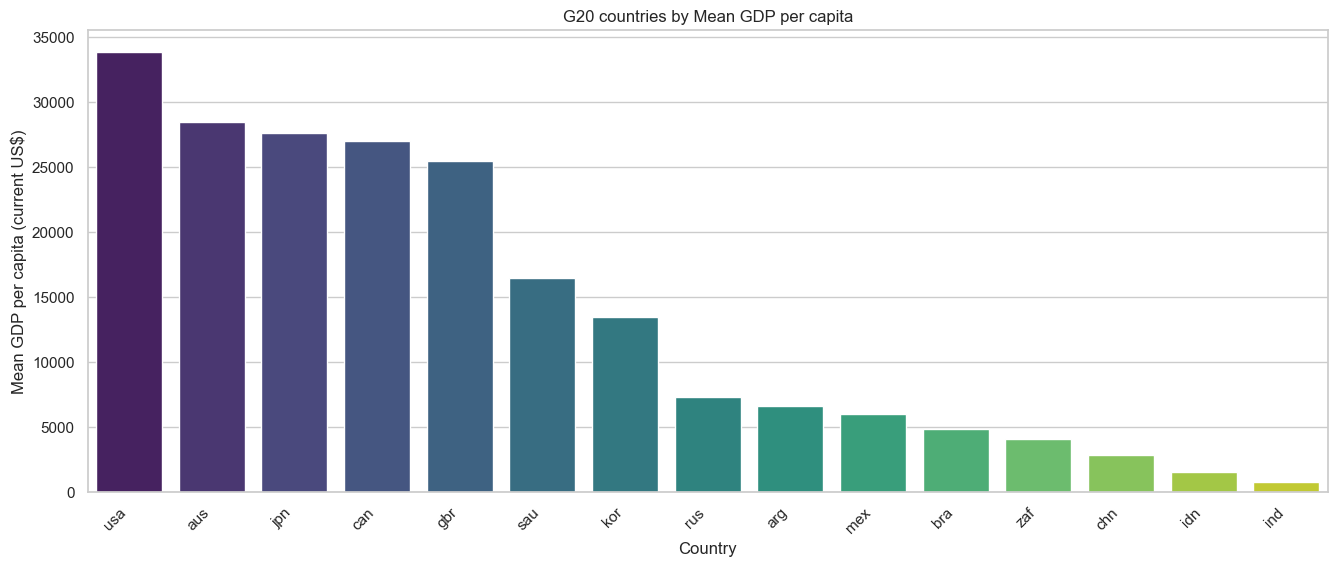

In [21]:
mean_gdps = g20_filled.groupby('country')["GDP per capita (current US$)"].mean().sort_values(ascending=False)
mean_gdps = pd.DataFrame(mean_gdps).reset_index()

# plot the GDP per capita by country
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x="country", y="GDP per capita (current US$)", data=mean_gdps, palette="viridis", ax=ax)
ax.set_title("G20 countries by Mean GDP per capita")
ax.set_xlabel("Country")
ax.set_ylabel("Mean GDP per capita (current US$)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

## Find top factors affecting GDP per capita

In [22]:
# top 10 factors that affect GDP per capita
top_factors_gdp_per_capita = g20_filled.corr(numeric_only=True)["GDP per capita (current US$)"].abs().sort_values(ascending=False)[:10]
top_factors_gdp_per_capita.head(10)

GDP per capita (current US$)                           1.000000
Electric power consumption (kWh per capita)_lag1       0.605837
Life expectancy at birth, total (years)_lag1           0.596418
School enrollment, secondary (% gross)_lag1            0.522005
year                                                   0.501211
School enrollment, tertiary (% gross)_lag1             0.447032
Domestic credit to private sector (% of GDP)_lag1      0.419009
Mobile cellular subscriptions (per 100 people)_lag1    0.404045
Patent applications, residents_lag1                    0.357571
Broad money (% of GDP)_lag1                            0.283348
Name: GDP per capita (current US$), dtype: float64

## Correlation between Variables

### Correlation between Top 10 factors that affect GDP per capita

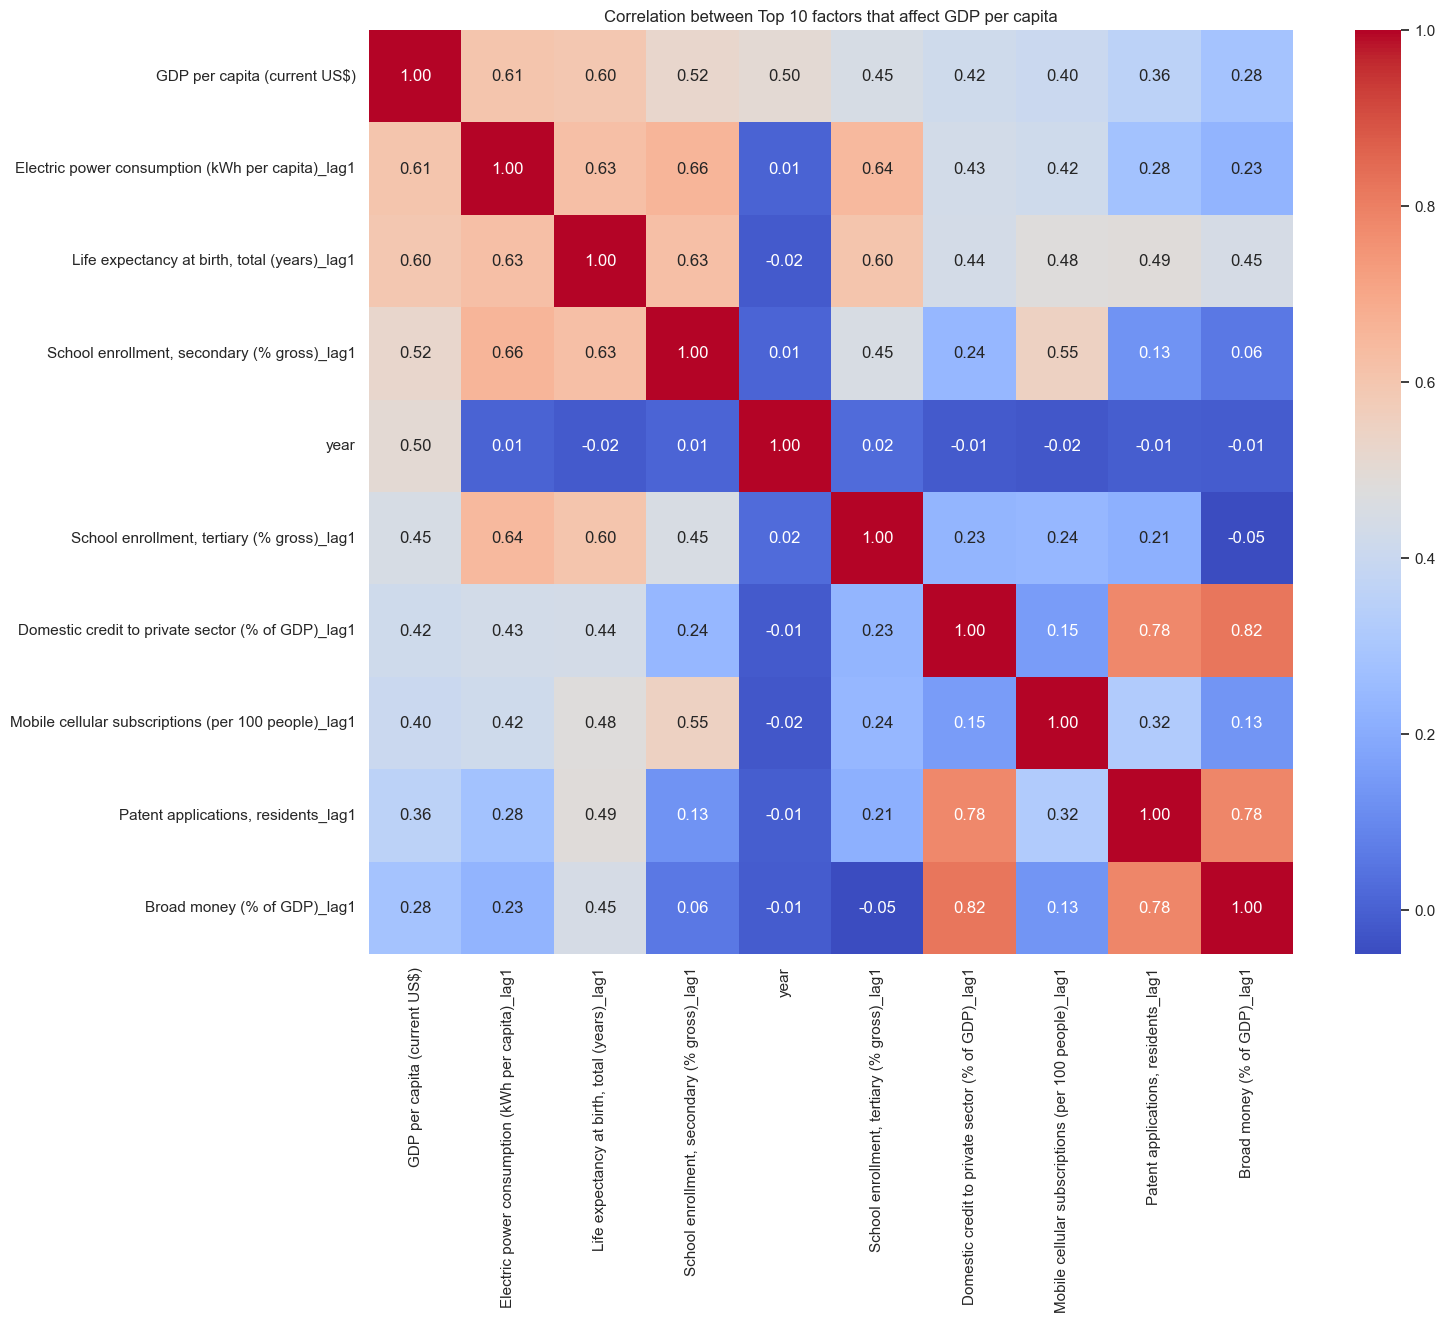

In [23]:
# columns for these factors
columns_gdp_per_capita = top_factors_gdp_per_capita.index

# create a new dataframe with the columns for GDP per capita
corr_gdp_per_capita = g20_filled[columns_gdp_per_capita].corr(numeric_only=True)

# plot the correlation matrix for GDP per capita
plt.figure(figsize=(16,12))
sns.heatmap(corr_gdp_per_capita, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation between Top 10 factors that affect GDP per capita")
plt.show()

In [24]:
# Find all pairs of features with |correlation| > 0.7 (excluding self-correlation and duplicates)
corr_matrix = corr_gdp_per_capita.drop("GDP per capita (current US$)", axis=1).copy()
threshold = 0.7
already_reported = set()

print("Highly correlated feature pairs (|r| > 0.7):")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        r = corr_matrix.iloc[i, j]
        if abs(r) > threshold:
            pair = tuple(sorted([col1, col2]))
            if pair not in already_reported:
                print(f"{col1} <-> {col2}: r = {r:.2f}")
                already_reported.add(pair)

Highly correlated feature pairs (|r| > 0.7):
Mobile cellular subscriptions (per 100 people)_lag1 <-> Patent applications, residents_lag1: r = 0.78
Mobile cellular subscriptions (per 100 people)_lag1 <-> Broad money (% of GDP)_lag1: r = 0.82


I'm not sure they have redundancy. I'll just leave them at this moment and handle these colinearity in the modeling process.

# 5. Modeling
Feature Selection to explain what drives GDP per capita

## Training and Testing Sets

In [25]:
from sklearn.model_selection import train_test_split

X = g20_filled.drop(columns=["GDP per capita (current US$)", "country", "year"])
y = g20_filled["GDP per capita (current US$)"]

y.dropna(inplace=True)

In [26]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(633, 10) (159, 10) (633,) (159,)


## Feature Selection

### (1) Ridge regression (handling multicolinearity and doling some feature selection)

In [27]:
# scale the features
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
train_X_scaled = SS.fit_transform(train_X)
test_X_scaled = SS.transform(test_X)

In [28]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Ridge with cross-validation
ridge = RidgeCV(cv=5)
ridge.fit(train_X_scaled, train_y)
ridge_pred = ridge.predict(train_X_scaled)

# Cross-validation scores
cv_scores_ridge = cross_val_score(ridge, train_X_scaled, train_y, cv=5, scoring="r2")
print("Ridge CV R2 Scores mean:", cv_scores_ridge.mean())

# RMSE
cv_mse_ridge = cross_val_score(ridge, train_X_scaled, train_y, cv=5, scoring="neg_mean_squared_error")
print("MSE:", np.sqrt(-cv_mse_ridge.mean()))

Ridge CV R2 Scores mean: 0.4151852610138869
MSE: 11743.549080803328


### (2) LASSO regression (for Feature Selection)

In [29]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

# LASSO with cross-validation
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(train_X_scaled, train_y)

# selected features (with non-zero coefficients)
selected_features_lasso = train_X.columns[lasso.coef_!=0]
print("Selected features:", pd.Series(selected_features_lasso).to_string())

# Cross-validation scores
cv_scores_lasso = cross_val_score(lasso, train_X_scaled, train_y, cv=5, scoring="r2")
print("Mean cross-validation score:", cv_scores_lasso.mean())

# RMSE
cv_mse_lasso = cross_val_score(lasso, train_X_scaled, train_y, cv=5, scoring="neg_mean_squared_error")
print("RMSE:", np.sqrt(-cv_mse_lasso.mean()))

Selected features: 0          School enrollment, secondary (% gross)_lag1
1            School enrollment, primary (% gross)_lag1
2     Electric power consumption (kWh per capita)_lag1
3    Mobile cellular subscriptions (per 100 people)...
4         Life expectancy at birth, total (years)_lag1
5    Domestic credit to private sector (% of GDP)_lag1
Mean cross-validation score: 0.40080713506588805
RMSE: 11885.614835189212


### (3) Random Forest and feature importance 

In [30]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Random Forest with cross-validation
RandomForest = RandomForestRegressor(n_estimators=50, max_depth=6, max_features=0.8, random_state=42)
RandomForest.fit(train_X_scaled, train_y)
RandomForest.fit(train_X_scaled, train_y)

# feature importance
importances = pd.Series(RandomForest.feature_importances_, index=train_X.columns)
top_features = importances.sort_values(ascending=False).head(10)
print("top 10 features:", top_features)

# cross-validation scores
cv_scores_randomforest = cross_val_score(RandomForest, train_X_scaled, train_y, cv=5, scoring="r2")
print("Cross-validation R2 score mean:", cv_scores_randomforest.mean())
print("Cross-validation R2 score std:", cv_scores_randomforest.std())

# RMSE
cv_mse_randomforest = cross_val_score(RandomForest, train_X_scaled, train_y, cv=5, scoring="neg_mean_squared_error")
print("Cross-validation RMSE score mean:", np.sqrt(-cv_mse_randomforest.mean()))
print("Cross-validation RMSE score std:", np.sqrt(cv_mse_randomforest.std()))


top 10 features: School enrollment, secondary (% gross)_lag1            0.576120
Life expectancy at birth, total (years)_lag1           0.228393
Mobile cellular subscriptions (per 100 people)_lag1    0.106617
Domestic credit to private sector (% of GDP)_lag1      0.031970
School enrollment, tertiary (% gross)_lag1             0.023947
Electric power consumption (kWh per capita)_lag1       0.014794
Patent applications, residents_lag1                    0.005653
Broad money (% of GDP)_lag1                            0.005506
Total reserves (includes gold, current US$)_lag1       0.003952
School enrollment, primary (% gross)_lag1              0.003047
dtype: float64
Cross-validation R2 score mean: 0.43727857935343195
Cross-validation R2 score std: 0.11801810501290994
Cross-validation RMSE score mean: 11518.271469661315
Cross-validation RMSE score std: 4467.274737089406


In [31]:
# check R^2 of the random forest model on the test set
from sklearn.metrics import r2_score, mean_squared_error
rf_preds = RandomForest.predict(test_X_scaled)
r2_rf = r2_score(test_y, rf_preds)
print(f"R^2 of the random forest model on the test set: {r2_rf}")


# check RMSE of the random forest model on the test set
rmse_rf = np.sqrt(mean_squared_error(test_y, rf_preds))
print(f"RMSE of the random forest model on the test set: {rmse_rf}")

R^2 of the random forest model on the test set: 0.47772875733916664
RMSE of the random forest model on the test set: 12657.12403987623


### (4) XGBoost for Regression

In [32]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [33]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=10, random_state=42)
xgb_model.fit(train_X, train_y)
y_pred = xgb_model.predict(test_X)

# check the performance of the model
print("R^2 score:", r2_score(test_y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(test_y, y_pred)))

R^2 score: 0.48419128711474735
RMSE: 12578.571317624124


## So far, I've got very low model performances across possible regression models. I'll keep this demonstrating combining stock market data (stock trade total value).

# 6. Combining with the Stock Data

I demonstrated how to add stock market data into indicators and evaluate how stock market affect GDP per capita prediction.

In [34]:
# create a new dataframe with the selected indicators
g20_stockmarket = pd.concat([g20_data[["year", "country"]], g20_data[["Stocks traded, total value (% of GDP)"]]], axis=1)
g20_stockmarket.columns

# check the missing values percentage in each feature
g20_stockmarket.isna().mean()

year                                     0.000000
country                                  0.000000
Stocks traded, total value (% of GDP)    0.260288
dtype: float64

In [35]:
g20_stockmarket.head()

,year,country,"Stocks traded, total value (% of GDP)"
2659,1970,arg,NaN
2663,1970,aus,NaN
2679,1970,bra,NaN
2685,1970,can,NaN
2690,1970,chn,NaN


In [36]:
# createing lagged features (lag features by 1 year for each country)
stock_lagged = create_lagged_features(g20_stockmarket, group_col='country', time_col='year', features=["Stocks traded, total value (% of GDP)"], lags=[1])
stock_lagged.head()

,year,country,"Stocks traded, total value (% of GDP)_lag1"
2659,1970,arg,NaN
2924,1971,arg,NaN
3189,1972,arg,NaN
3454,1973,arg,NaN
3719,1974,arg,NaN


In [37]:
# Fill missing values in lagged features by forward fill
stock_filled = stock_lagged.copy()
stock_filled = stock_filled.groupby("country")["Stocks traded, total value (% of GDP)_lag1"].transform(lambda x: x.ffill())
stock_filled = pd.DataFrame(stock_filled)

stock_filled.head()

,"Stocks traded, total value (% of GDP)_lag1"
2659,NaN
2924,NaN
3189,NaN
3454,NaN
3719,NaN


In [48]:
# combine the stock market data with the original features
g20_combined = pd.concat([g20_filled, stock_filled], axis=1)
g20_combined.dropna(inplace=True)

print(g20_combined.shape)
g20_combined.head()


(596, 14)


,year,country,"Patent applications, residents_lag1","School enrollment, secondary (% gross)_lag1","School enrollment, tertiary (% gross)_lag1","School enrollment, primary (% gross)_lag1",Electric power consumption (kWh per capita)_lag1,Mobile cellular subscriptions (per 100 people)_lag1,"Life expectancy at birth, total (years)_lag1","Total reserves (includes gold, current US$)_lag1",Broad money (% of GDP)_lag1,Domestic credit to private sector (% of GDP)_lag1,GDP per capita (current US$),"Stocks traded, total value (% of GDP)_lag1"
4249,1976.0,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443,1946.919904,0.858146
4514,1977.0,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443,2126.485460,1.575157
4779,1978.0,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443,3282.063044,0.420915
5044,1979.0,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443,2511.973329,0.395286
5309,1980.0,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443,2747.502275,2.124838


In [52]:
# match the index of features with the index of GDP per capita
g20_combined["GDP per capita (current US$)"] = df_lagged["GDP per capita (current US$)"][df_lagged.index.isin(g20_combined.index)]

g20_combined.dropna(inplace=True)
g20_combined.head()


,year,country,"Patent applications, residents_lag1","School enrollment, secondary (% gross)_lag1","School enrollment, tertiary (% gross)_lag1","School enrollment, primary (% gross)_lag1",Electric power consumption (kWh per capita)_lag1,Mobile cellular subscriptions (per 100 people)_lag1,"Life expectancy at birth, total (years)_lag1","Total reserves (includes gold, current US$)_lag1",Broad money (% of GDP)_lag1,Domestic credit to private sector (% of GDP)_lag1,GDP per capita (current US$),"Stocks traded, total value (% of GDP)_lag1"
4249,1976.0,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443,1946.919904,0.858146
4514,1977.0,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443,2126.485460,1.575157
4779,1978.0,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443,3282.063044,0.420915
5044,1979.0,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443,2511.973329,0.395286
5309,1980.0,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443,2747.502275,2.124838


In [55]:
# check the data structure
print("Any missing values:", g20_filled.isna().any().any())
print(g20_combined.shape)

Any missing values: False
(596, 14)


In [59]:
g20_combined.head()

,year,country,"Patent applications, residents_lag1","School enrollment, secondary (% gross)_lag1","School enrollment, tertiary (% gross)_lag1","School enrollment, primary (% gross)_lag1",Electric power consumption (kWh per capita)_lag1,Mobile cellular subscriptions (per 100 people)_lag1,"Life expectancy at birth, total (years)_lag1","Total reserves (includes gold, current US$)_lag1",Broad money (% of GDP)_lag1,Domestic credit to private sector (% of GDP)_lag1,GDP per capita (current US$),"Stocks traded, total value (% of GDP)_lag1"
4249,1976.0,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443,1946.919904,0.858146
4514,1977.0,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443,2126.485460,1.575157
4779,1978.0,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443,3282.063044,0.420915
5044,1979.0,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443,2511.973329,0.395286
5309,1980.0,arg,792.0,81.11338,54.333271,110.991566,1468.053656,7.371312,73.172,1.549943e+10,25.147605,17.451443,2747.502275,2.124838


In [74]:
# split the data into training and testing sets
X = g20_combined.drop(columns=["country","year", "GDP per capita (current US$)"])
y = g20_combined["GDP per capita (current US$)"]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(476, 11) (120, 11) (476,) (120,)


In [75]:
# fit a random forest model
RandomForest = RandomForestRegressor(n_estimators=50, max_depth=6, max_features=0.8, random_state=2)
RandomForest.fit(train_X, train_y)

# cross-validation scores
cv_scores_randomforest = cross_val_score(RandomForest, train_X, train_y, cv=5, scoring="r2")
print("Cross-validation R2 score mean:", cv_scores_randomforest.mean())
print("Cross-validation R2 score std:", cv_scores_randomforest.std())

# RMSE
cv_mse_randomforest = cross_val_score(RandomForest, train_X, train_y, cv=5, scoring="neg_mean_squared_error")
print("Cross-validation RMSE score mean:", np.sqrt(-cv_mse_randomforest.mean()))
print("Cross-validation RMSE score std:", np.sqrt(cv_mse_randomforest.std()))


Cross-validation R2 score mean: 0.8271056919296427
Cross-validation R2 score std: 0.020885374465849357
Cross-validation RMSE score mean: 7031.172575719424
Cross-validation RMSE score std: 2457.212799851294


In [76]:
# check R^2 of the random forest model on the test set
rf_preds = RandomForest.predict(test_X)
r2_rf = r2_score(test_y, rf_preds)
print(f"R^2 of the random forest model on the test set: {r2_rf}")


# check RMSE of the random forest model on the test set
rmse_rf = np.sqrt(mean_squared_error(test_y, rf_preds))
print(f"RMSE of the random forest model on the test set: {rmse_rf}")

R^2 of the random forest model on the test set: 0.8764818929288795
RMSE of the random forest model on the test set: 5610.616855802114


In [77]:
# find the top important features
importances = pd.Series(RandomForest.feature_importances_, index=train_X.columns)
top_features = importances.sort_values(ascending=False)
print("top features:","\n",top_features)

top features: 
 School enrollment, secondary (% gross)_lag1            0.370878
Stocks traded, total value (% of GDP)_lag1             0.347653
Life expectancy at birth, total (years)_lag1           0.114003
Mobile cellular subscriptions (per 100 people)_lag1    0.094989
Electric power consumption (kWh per capita)_lag1       0.023880
Broad money (% of GDP)_lag1                            0.015593
School enrollment, tertiary (% gross)_lag1             0.011432
Patent applications, residents_lag1                    0.007648
Domestic credit to private sector (% of GDP)_lag1      0.007158
School enrollment, primary (% gross)_lag1              0.003436
Total reserves (includes gold, current US$)_lag1       0.003330
dtype: float64


Text(0, 0.5, 'Features')

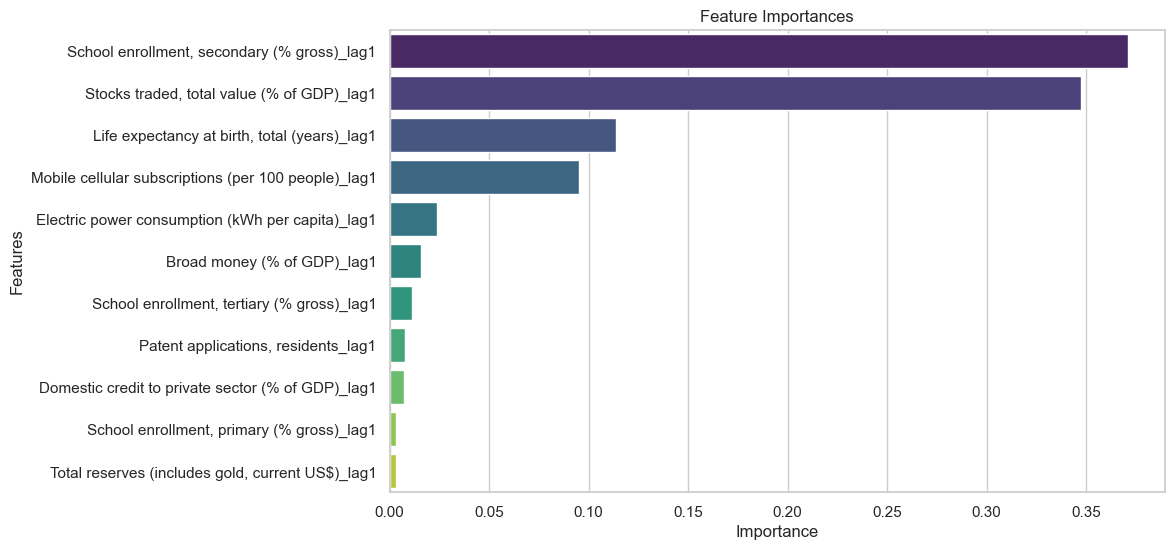

In [78]:
# plot the feature importances from the random forest model
top_features_with_order = pd.DataFrame(top_features, index=top_features.index)

# plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index, data=top_features_with_order, palette="viridis")
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')

## The model with `Stock trade total value` performs way better than those without the stock feature. However, I need to check whether there is any data leakage while training the model or whether any irrelevant features are included with appropriate review and interpretation.